In [1]:
import pandas as pd
import glob

files = glob.glob(r"C:\Users\User\Desktop\UK-crime-blog\data\raw\*.csv")
df_list = [pd.read_csv(file) for file in files]
df = pd.concat(df_list, ignore_index=True)

# Filter for South Wales
df = df[df['Falls within'] == 'South Wales Police']

import os

# Create the directory if it doesn't exist
os.makedirs("data/cleaned", exist_ok=True)

# Now save the file
df.to_csv("data/cleaned/south_wales_crime.csv", index=False)


In [2]:
print(df.shape)
print(df.columns)

(402840, 12)
Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')


In [3]:
import pandas as pd

df = pd.read_csv("data/cleaned/south_wales_crime.csv")
print(df.columns)
print(df.shape)
df.head()

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')
(402840, 12)


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2022-08,South Wales Police,South Wales Police,-3.246597,51.775911,On or near,W01001481,Blaenau Gwent 006E,Anti-social behaviour,NaN,NaN
1,a4a475a0e6486d9a6d06e5ab267cc4bf855aa674e97c63...,2022-08,South Wales Police,South Wales Police,-3.248458,51.772647,On or near Stryd Yr Undeb,W01001481,Blaenau Gwent 006E,Violence and sexual offences,Status update unavailable,NaN
2,NaN,2022-08,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,W01000991,Bridgend 001A,Anti-social behaviour,NaN,NaN
3,NaN,2022-08,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,W01000991,Bridgend 001A,Anti-social behaviour,NaN,NaN
4,NaN,2022-08,South Wales Police,South Wales Police,-3.658828,51.634723,On or near Tudor Estate,W01000991,Bridgend 001A,Anti-social behaviour,NaN,NaN


In [4]:
df['Crime type'].value_counts().head(10)

Crime type
Violence and sexual offences    142428
Anti-social behaviour            60409
Public order                     44624
Shoplifting                      37276
Criminal damage and arson        32690
Other theft                      23379
Vehicle crime                    19646
Burglary                         11530
Drugs                            10354
Other crime                       8147
Name: count, dtype: int64

In [5]:
df_filtered = df[
    (df['Latitude'].between(51.4, 51.8)) &
    (df['Longitude'].between(-4.1, -3.8))
]

In [6]:
df_filtered = df[df['LSOA name'].str.contains('Swansea|Neath|Port Talbot', case=False, na=False)]

In [7]:
df_filtered.head()
df_filtered.to_csv('../../filtered_crime_data.csv', index=False)

<Axes: title={'center': 'Monthly Crime Trend in South Wales'}, xlabel='Month'>

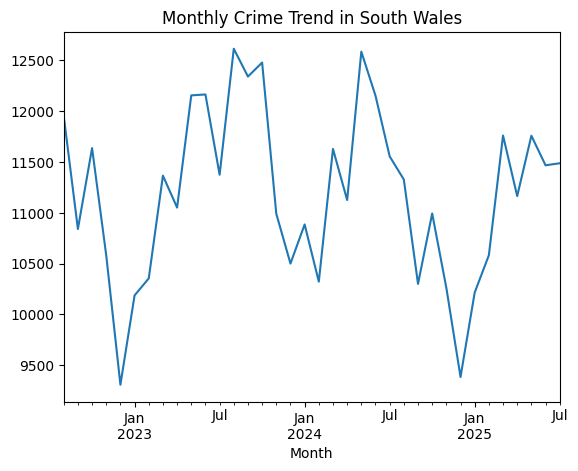

In [8]:
df['Month'] = pd.to_datetime(df['Month'])
monthly_trend = df.groupby(df['Month'].dt.to_period('M')).size()
monthly_trend.plot(kind='line', title='Monthly Crime Trend in South Wales')

In [9]:
df['Location'].value_counts().head(10)

Location
On or near Parking Area              14544
On or near                           13623
No Location                          10210
On or near Supermarket               10079
On or near Shopping Area              5891
On or near Petrol Station             5354
On or near Sports/Recreation Area     4350
On or near Nightclub                  3186
On or near Police Station             1559
On or near High Street                1398
Name: count, dtype: int64

In [10]:
df = pd.read_csv('filtered_crime_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'filtered_crime_data.csv'

In [ ]:
pip install folium

In [ ]:
# Drop rows with missing Latitude or Longitude
df_clean = df.dropna(subset=['Latitude', 'Longitude'])

# Build heatmap data
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_clean.iterrows()]

# Create map
import folium
from folium.plugins import HeatMap

crime_map = folium.Map(location=[51.6, -3.9], zoom_start=10)
HeatMap(heat_data).add_to(crime_map)
crime_map

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Load your cleaned crime data
df = pd.read_csv('filtered_crime_data.csv')  # or whatever file you saved

# Create map centered on Swansea
m = folium.Map(location=[51.6214, -3.9436], zoom_start=12)

# Add heatmap layer
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Save to templates folder
m.save('app/templates/heatmap.html')